# Librerías

In [77]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import plotnine as pn

import seaborn as sns

from tabulate import tabulate
from keras.models import Sequential
from keras.layers import  Dense
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn import  metrics

from sklearn.linear_model import LogisticRegression

# Funciones

In [78]:
def count0(df):
    for column_name in df.columns:
        column = df[column_name]
        count = (column == 0).sum()
        print('Columna:', column_name, ' : ', count)

# Carga Datos

In [79]:
data_loc = Path('1-descarga-datos/')
handles_file = data_loc / '2021-08-11-handles-data.csv'
tweet_file = data_loc / '2021-08-11-2021-08-12-2021-08-19-tweets-data.csv'

pd.set_option('display.max_columns', 500)

tweets_data = pd.read_csv(tweet_file)

twitter_users = pd.read_csv(handles_file)

frames = [twitter_users, tweets_data]
df_c = tweets_data.merge(twitter_users, left_on='user_id', right_on='id')
df_c.dropna(how='all', axis=1, inplace=True)

C:\Users\hecto\AppData\Local\Temp\ipykernel_3440\959839806.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.


# Selección columnas

In [81]:

df2 = pd.DataFrame({
    'Tweets' : df_c['tweets'],
    'Media' : df_c['media'],
    'Followers' : df_c['followers'],
    'Following' : df_c['following'],
    'nlikes' : df_c['nlikes'],
    'nretweets' : df_c['nretweets'],
    'language' : df_c['language'],
    'Image' : df_c['photos'].map(lambda x : 1 if x != '[]' else 0),
    'Video' : df_c['video']
})
df2.head()

,Tweets,Media,Followers,Following,nlikes,nretweets,language,Image,Video
0,1770,461,20854298,16,0,232,en,0,0
1,11420,2170,108819032,235,5266,408,en,1,1
2,11420,2170,108819032,235,0,764,en,0,0
3,11420,2170,108819032,235,5638,438,en,0,0
4,11420,2170,108819032,235,8810,1211,en,0,0


# Transformar columnas

In [82]:
from sklearn.preprocessing import OneHotEncoder
enc_ohe = OneHotEncoder(sparse=False)
enc_ohe.fit(df2[['language']])

data_encoder = enc_ohe.transform(df2[['language']])

feature_names = enc_ohe.get_feature_names(input_features=['language'])
df2_encoder = pd.DataFrame(data_encoder, columns = list(feature_names))

df2 = df2.join(df2_encoder)
df2.drop(columns =['language'], inplace = True)

df2.head()

c:\Users\hecto\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


,Tweets,Media,Followers,Following,nlikes,nretweets,Image,Video,language_ar,language_ca,language_cs,language_cy,language_da,language_de,language_en,language_es,language_et,language_eu,language_fa,language_fi,language_fr,language_hi,language_ht,language_hu,language_in,language_is,language_it,language_iw,language_ja,language_ko,language_lt,language_lv,language_mr,language_nl,language_no,language_pl,language_pt,language_ro,language_ru,language_sv,language_ta,language_th,language_tl,language_tr,language_und,language_ur,language_vi,language_zh
0,1770,461,20854298,16,0,232,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11420,2170,108819032,235,5266,408,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11420,2170,108819032,235,0,764,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11420,2170,108819032,235,5638,438,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11420,2170,108819032,235,8810,1211,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
df2['target'] = (df2.nlikes + df2.nretweets)

-   Quantiles para la creación del corte del target

In [85]:
print(df2['target'].quantile([0.7,0.88,0.97]))

0.70      227.00
0.88     1438.00
0.97    10856.28
Name: target, dtype: float64


-   Se selecciona el target de esta manera ya que desde mi perspectiva para que un tweet sea popular hay que basarse en el número de likes y retweets que este tenga, entonces si una cuenta tiene tweets con muchos likes y retweets seguramente al subir otro tweet este será popular.

In [86]:
df2['target'] = df2['target'].map(lambda x: 1 if x > 35000 else 0)

-   DataFrame utilizado en el apartado de Conclusión

In [87]:
if_df = df2.copy(deep=True)

In [88]:
df2.drop(columns=['nlikes', 'nretweets'], inplace=True)

# Separación datos

In [89]:
y = df2.target
X = df2.drop(columns = ['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

-   Para el entrenamiento del modelo empleo regresión logistica debido a que para solucionar problemas de classificación binaria me parece la opción más acertada.
*   Al añadir el asset (class_weight)  en el modelo con el valor 'balanced' cambia los pesos para penalizar los fallos.

In [91]:
y = y_train
X = X_train

model = LogisticRegression(class_weight='balanced') # Elegir el modelo
model.fit(X, y) # Entrenar el modelo

predictions = model.predict(X_test) # Predecir con el modelo
probability = model.predict_proba(X_test)

res = pd.DataFrame()

# Miramos a ver qué tal...
res['predictions'] = predictions
res['NoPopular'] = probability[:, 0] 
res['Popular'] = probability[:, 1] 
res['correct'] = (y_test.values == res.predictions)


In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
print(res[['predictions', 'correct']].describe())

        predictions
count  12261.000000
mean       0.171601
std        0.377049
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


In [94]:
score = model.score(X_train, y_train)
print(score)

0.8294763336363


In [95]:
resto = pd.DataFrame({
    'y' : y_test.values,
    'res' : res.predictions
})

*   Al aplicar la matriz de confusión al resultado de las predicciones junto con y_true aparece que hay una gran mayoría de Verdaderos Negativos '10271', una pequeña cantidad de Falsos Negativos '14' comparado con el total de filas que hay 'y_test.size', también los Verdaderos Positivos son pocos '93' esto debido a que a la hora de crear el target la cantidad de tweets populares que rebasarían esa franja son pocos, esto lo muestro en la celda que aparecen los cuantiles previa a la creación del Objetivo.

In [97]:
confusion_matrix(resto['y'],resto.res)

array([[10149,  2002],
       [    8,   102]], dtype=int64)

In [99]:
res.correct.value_counts()

True     10251
False     2010
Name: correct, dtype: int64

In [100]:
resto.groupby('y').res.value_counts(normalize = True).sort_index()

y  res
0  0      0.835240
   1      0.164760
1  0      0.072727
   1      0.927273
Name: res, dtype: float64

In [101]:
print(score)

0.8294763336363


In [133]:
roc_auc_score(y, model.decision_function(X))

0.9265818332624638

In [132]:
roc_auc_score(y, model.predict_proba(X)[:, 1])

0.9265818332624638

c:\Users\hecto\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


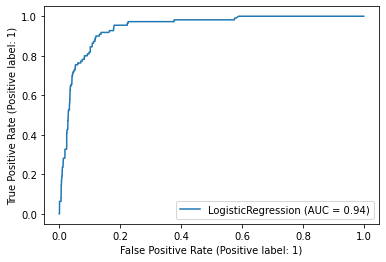

In [130]:
metrics.plot_roc_curve(model, X_test, y_test) 

# RandomForest

In [105]:
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [106]:
grid = {
    'n_estimators' : [250, 1000, 2000],
    'max_depth' : [None, 10, 20]
}

optimized_pipeline = sklearn.model_selection.GridSearchCV(RandomForestClassifier(random_state=0, class_weight='balanced'), grid)

optimized_pipeline.fit(X_train, y_train)

print(optimized_pipeline.best_params_)

predictions = optimized_pipeline.predict(X_test)

proba = optimized_pipeline.predict_proba(X_test)[:,1]

{'max_depth': 20, 'n_estimators': 250}


-   En el gráfico "roc_curve" muestra un ratio casi perfecto por culpa de la falta de datos, por lo que se produce overfitting.

c:\Users\hecto\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


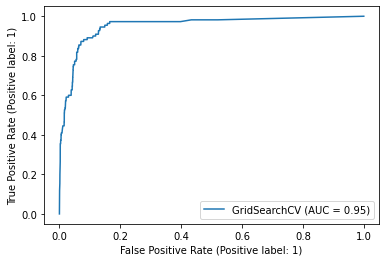

In [131]:
metrics.plot_roc_curve(optimized_pipeline, X_test, y_test) 

In [108]:
sc = optimized_pipeline.score(X_train, y_train)
print(sc)

0.969656715374397


In [121]:
rest = pd.DataFrame({
    'pred' : predictions,
    'Y' : y_test.values
})

In [112]:
confusion_matrix(res['Y'],res.pred)

array([[11789,   362],
       [   44,    66]], dtype=int64)

In [114]:
res.pred.value_counts()

0    11833
1      428
Name: pred, dtype: int64

In [140]:
optimized_pipeline.cv_results_

{'mean_fit_time': array([ 3.21047106, 11.68834939, 23.15005698,  2.0980185 ,  8.31842127,
        16.62373171,  2.34624653,  9.98977232, 19.2503336 ]),
 'std_fit_time': array([0.09503488, 0.57188451, 1.40515417, 0.02401677, 0.0833864 ,
        0.37283885, 0.04455153, 0.87734546, 0.28898728]),
 'mean_score_time': array([0.19813151, 0.72437706, 1.38057232, 0.12221055, 0.4651484 ,
        0.94140272, 0.1381701 , 0.56642771, 1.10357542]),
 'std_score_time': array([0.02071888, 0.0517812 , 0.16581076, 0.00771252, 0.00504127,
        0.02666827, 0.0018619 , 0.02533129, 0.0225726 ]),
 'param_max_depth': masked_array(data=[None, None, None, 10, 10, 10, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[250, 1000, 2000, 250, 1000, 2000, 250, 1000, 2000],
              mask=[False, False, False, False, False, False, False, False,
         

# Conclusión

-   Teniendo en cuenta que en la prediccion del if es el computo global de datos y en el de los modelos es una tercera parte de los datos se aprecia claramente que tomando como referencia la suma de likes y retweets este problema de classificación binaria se podria proceder de manera mucho más sencilla aunque no más precisa, ahorrando mucho tiempo y código con este método propuesto.

In [ ]:
if_df['target'] = (if_df.nlikes + if_df.nretweets)
if_df['target'] = if_df['target'].apply(lambda x : 1 if x > 35000 else 0)

In [138]:
print(f'Logistic Regression predictions: \n{resto.y.value_counts()}\n Random Forest prediction: \n{rest.Y.value_counts()}\n If "Predictions": \n{if_df.target.value_counts()}\n ')


Logistic Regression predictions: 
0    12151
1      110
Name: y, dtype: int64
 Random Forest prediction: 
0    12151
1      110
Name: Y, dtype: int64
 If "Predictions": 
0    40522
1      345
Name: target, dtype: int64
 
